In [4]:
import pandas as pd
import nltk


### Loading Data

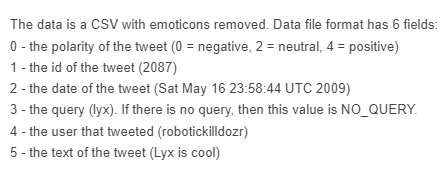

In [5]:
# mr = pd.read_excel('datasets/datasets.xls', sheet_name='MR',header=None)

In [6]:
mr = pd.read_csv('datasets/train_with_polarity.csv',header=None)
mr.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
mr = mr.drop(columns=[1,2,3,4])
mr.head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
mr.columns = ['sentiment','text']
mr

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


### Punctuation Removal

In [9]:
import string
string.punctuation
newpunctuation = '!"#$%&\()*+,./:;<=>?@[\\]^_`{|}~'
hyphen = '-'


In [10]:
newpunctuation

'!"#$%&\\()*+,./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punc(text):
    punctuationfree="".join([i for i in text if i not in newpunctuation])
    return punctuationfree

In [12]:
mr['no_punc_text'] = mr['text'].apply(lambda x: remove_punc(x))

In [13]:
mr

,sentiment,text,no_punc_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl - Awww that's a...
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no it's not behaving at all i'...
...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,Just woke up Having no school is the best feel...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,TheWDBcom - Very cool to hear old Walt intervi...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover Ask me fo...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time Tup...


### Seperated hyphenated words

In [14]:
hyphen_dict = {
    "-" : " "
}

In [15]:
def remove_hyphen(text):
    hyphenfree = "".join(hyphen_dict[text] if text in hyphen_dict else text for text in text)
    return hyphenfree

In [16]:
mr['no_punc_text'] = mr['no_punc_text'].apply(lambda x: remove_hyphen(x))

In [17]:
mr

,sentiment,text,no_punc_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl Awww that's a...
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no it's not behaving at all i'...
...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,Just woke up Having no school is the best feel...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,TheWDBcom Very cool to hear old Walt intervi...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover Ask me fo...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time Tup...


### Remove Contractions

In [18]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [19]:
def remove_contractions(text):
    words = text.split()
    reformed = " ".join(CONTRACTION_MAP[word] if word in CONTRACTION_MAP else word for word in words)
    return reformed

In [20]:
mr['no_punc_text'] = mr['no_punc_text'].apply(lambda x: remove_contractions(x))

In [21]:
mr

,sentiment,text,no_punc_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl Awww that is a ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cannot update his Facebook by...
2,0,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no it is not behaving at all i...
...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,Just woke up Having no school is the best feel...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,TheWDBcom Very cool to hear old Walt interview...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover Ask me fo...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time Tup...


### Remove " 's " that are possessive nouns

In [22]:
def remove_pos_nouns(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [23]:
mr['no_punc_text'] = mr['no_punc_text'].apply(lambda x: remove_pos_nouns(x))

In [24]:
mr

,sentiment,text,no_punc_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl Awww that is a ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cannot update his Facebook by...
2,0,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no it is not behaving at all i...
...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,Just woke up Having no school is the best feel...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,TheWDBcom Very cool to hear old Walt interview...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover Ask me fo...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time Tup...


### Lower case text

In [25]:
mr["no_punc_text"]= mr['no_punc_text'].apply(lambda x: x.lower())

In [26]:
mr.head()

,sentiment,text,no_punc_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww that is a ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no it is not behaving at all i...


### Tokenization

In [27]:
import re
def tokenization(text):
    tokens = re.split(r"\s+",text)
    return tokens

In [28]:
mr['text_tokenized'] = mr['no_punc_text'].apply(lambda x: tokenization(x))

In [29]:
mr

,sentiment,text,no_punc_text,text_tokenized
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww that is a ...,"[switchfoot, httptwitpiccom2y1zl, awww, that, ..."
1,0,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...,"[is, upset, that, he, cannot, update, his, fac..."
2,0,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,"[kenichan, i, dived, many, times, for, the, ba..."
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no it is not behaving at all i...,"[nationwideclass, no, it, is, not, behaving, a..."
...,...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,"[just, woke, up, having, no, school, is, the, ..."
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom very cool to hear old walt interview...,"[thewdbcom, very, cool, to, hear, old, walt, i..."
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me fo...,"[are, you, ready, for, your, mojo, makeover, a..."
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...,"[happy, 38th, birthday, to, my, boo, of, alll,..."


### Stopwords

In [30]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [31]:
mr['no_stopwords']= mr['text_tokenized'].apply(lambda x:remove_stopwords(x))

In [32]:
mr.head()

,sentiment,text,no_punc_text,text_tokenized,no_stopwords
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww that is a ...,"[switchfoot, httptwitpiccom2y1zl, awww, that, ...","[switchfoot, httptwitpiccom2y1zl, awww, bummer..."
1,0,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...,"[is, upset, that, he, cannot, update, his, fac...","[upset, cannot, update, facebook, texting, mig..."
2,0,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,"[kenichan, i, dived, many, times, for, the, ba...","[kenichan, dived, many, times, ball, managed, ..."
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no it is not behaving at all i...,"[nationwideclass, no, it, is, not, behaving, a...","[nationwideclass, behaving, mad, cannot, see]"


### Lemmatization

In [33]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [34]:
mr['text_lemmatized'] = mr['no_stopwords'].apply(lambda x:lemmatizer(x))

In [35]:
mr

,sentiment,text,no_punc_text,text_tokenized,no_stopwords,text_lemmatized
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww that is a ...,"[switchfoot, httptwitpiccom2y1zl, awww, that, ...","[switchfoot, httptwitpiccom2y1zl, awww, bummer...","[switchfoot, httptwitpiccom2y1zl, awww, bummer..."
1,0,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...,"[is, upset, that, he, cannot, update, his, fac...","[upset, cannot, update, facebook, texting, mig...","[upset, cannot, update, facebook, texting, mig..."
2,0,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,"[kenichan, i, dived, many, times, for, the, ba...","[kenichan, dived, many, times, ball, managed, ...","[kenichan, dived, many, time, ball, managed, s..."
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]","[whole, body, feel, itchy, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no it is not behaving at all i...,"[nationwideclass, no, it, is, not, behaving, a...","[nationwideclass, behaving, mad, cannot, see]","[nationwideclass, behaving, mad, cannot, see]"
...,...,...,...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,"[just, woke, up, having, no, school, is, the, ...","[woke, school, best, feeling, ever]","[woke, school, best, feeling, ever]"
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom very cool to hear old walt interview...,"[thewdbcom, very, cool, to, hear, old, walt, i...","[thewdbcom, cool, hear, old, walt, interviews,...","[thewdbcom, cool, hear, old, walt, interview, ..."
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me fo...,"[are, you, ready, for, your, mojo, makeover, a...","[ready, mojo, makeover, ask, details]","[ready, mojo, makeover, ask, detail]"
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...,"[happy, 38th, birthday, to, my, boo, of, alll,...","[happy, 38th, birthday, boo, alll, time, tupac...","[happy, 38th, birthday, boo, alll, time, tupac..."


### Export preprocessed data

In [36]:
def remove_punc(text):
    punctuationfree=" ".join([i for i in text if i not in string.punctuation])
    return punctuationfree

mr['text_lemmatized'] = mr['text_lemmatized'].apply(lambda x: remove_punc(x))

In [37]:
def define_class(text):
    if text == 4:
        return 1
    elif text == 0:
        return 0
mr['sentiment'] = mr['sentiment'].apply(lambda x: define_class(x))
mr

,sentiment,text,no_punc_text,text_tokenized,no_stopwords,text_lemmatized
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww that is a ...,"[switchfoot, httptwitpiccom2y1zl, awww, that, ...","[switchfoot, httptwitpiccom2y1zl, awww, bummer...",switchfoot httptwitpiccom2y1zl awww bummer sho...
1,0,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...,"[is, upset, that, he, cannot, update, his, fac...","[upset, cannot, update, facebook, texting, mig...",upset cannot update facebook texting might cry...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,"[kenichan, i, dived, many, times, for, the, ba...","[kenichan, dived, many, times, ball, managed, ...",kenichan dived many time ball managed save 50 ...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]",whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no it is not behaving at all i...,"[nationwideclass, no, it, is, not, behaving, a...","[nationwideclass, behaving, mad, cannot, see]",nationwideclass behaving mad cannot see
...,...,...,...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,"[just, woke, up, having, no, school, is, the, ...","[woke, school, best, feeling, ever]",woke school best feeling ever
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom very cool to hear old walt interview...,"[thewdbcom, very, cool, to, hear, old, walt, i...","[thewdbcom, cool, hear, old, walt, interviews,...",thewdbcom cool hear old walt interview ♫ httpb...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me fo...,"[are, you, ready, for, your, mojo, makeover, a...","[ready, mojo, makeover, ask, details]",ready mojo makeover ask detail
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...,"[happy, 38th, birthday, to, my, boo, of, alll,...","[happy, 38th, birthday, boo, alll, time, tupac...",happy 38th birthday boo alll time tupac amaru ...


In [38]:
preprocessed_data = mr[['text','text_lemmatized','sentiment']]
preprocessed_data.to_csv('preprocessed_data.csv')